In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
train_data.shape, train_labels.shape

((25000,), (25000,))

In [5]:
test_data.shape, test_labels.shape

((25000,), (25000,))

In [6]:
train_data[0], train_labels[0]

([1,
  14,
  22,
  16,
  43,
  530,
  973,
  1622,
  1385,
  65,
  458,
  4468,
  66,
  3941,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  4536,
  1111,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2025,
  19,
  14,
  22,
  4,
  1920,
  4613,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  1247,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2223,
  5244,
  16,
  480,
  66,
  3785,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  1415,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  5952,
  15,
  256,
  4,
  2,
  7,
  3766,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  46,
  7,
  4,
  2,
  1029,
  

In [7]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #macierz zer o kształcie...
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  #umieszczanie 1 pod wybranymi indeksami
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
train_labels[0], test_labels[0]

(1, 0)

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics='accuracy')

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
         validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5037 - accuracy: 0.7983 - val_loss: 0.3795 - val_accuracy: 0.8757
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3022 - accuracy: 0.9045 - val_loss: 0.3244 - val_accuracy: 0.8719
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2232 - accuracy: 0.9287 - val_loss: 0.2779 - val_accuracy: 0.8918
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1751 - accuracy: 0.9455 - val_loss: 0.3463 - val_accuracy: 0.8618
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1432 - accuracy: 0.9551 - val_loss: 0.2914 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1167 - accuracy: 0.9646 - val_loss: 0.2918 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0997 - accuracy: 0.9701 - val_loss: 0.3068 - val_accuracy: 0.8859
Epoch 8/20
30

<AxesSubplot:>

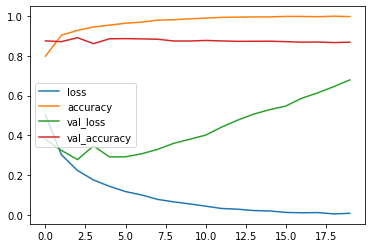

In [44]:
pd.DataFrame(history.history).plot() #nadmierne dopasowanie podczas trenowania po 4 epoce

In [49]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.7439 - accuracy: 0.8521


[0.7438557744026184, 0.8520799875259399]

In [46]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics='accuracy')

model2.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 18ms/step - loss: 0.4614 - accuracy: 0.8179
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2631 - accuracy: 0.9074
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2042 - accuracy: 0.9267
Epoch 4/4
49/49 [==============================] - 1s 17ms/step - loss: 0.1677 - accuracy: 0.9418


In [47]:
model2.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.2927 - accuracy: 0.8842


[0.2926614582538605, 0.8841999769210815]

In [50]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.00890367],
       [1.        ],
       [0.9921257 ],
       ...,
       [0.00249801],
       [0.03417153],
       [0.6379243 ]], dtype=float32)

In [51]:
model2.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.18782023],
       [0.9999281 ],
       [0.7521466 ],
       ...,
       [0.12649997],
       [0.07918593],
       [0.4989755 ]], dtype=float32)

In [54]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics='accuracy')

history3 = model3.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512,
         validation_data = (x_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 50ms/step - loss: 0.4957 - accuracy: 0.7823 - val_loss: 0.3625 - val_accuracy: 0.8674
Epoch 2/10
30/30 [==============================] - 1s 32ms/step - loss: 0.2783 - accuracy: 0.9070 - val_loss: 0.2914 - val_accuracy: 0.8889
Epoch 3/10
30/30 [==============================] - 1s 30ms/step - loss: 0.1987 - accuracy: 0.9334 - val_loss: 0.3165 - val_accuracy: 0.8711
Epoch 4/10
30/30 [==============================] - 1s 31ms/step - loss: 0.1596 - accuracy: 0.9465 - val_loss: 0.2835 - val_accuracy: 0.8861
Epoch 5/10
30/30 [==============================] - 1s 31ms/step - loss: 0.1233 - accuracy: 0.9600 - val_loss: 0.2965 - val_accuracy: 0.8837
Epoch 6/10
30/30 [==============================] - 1s 30ms/step - loss: 0.1018 - accuracy: 0.9670 - val_loss: 0.3200 - val_accuracy: 0.8837
Epoch 7/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0851 - accuracy: 0.9722 - val_loss: 0.3586 - val_accuracy: 0.8756
Epoch 8/10
30

<AxesSubplot:>

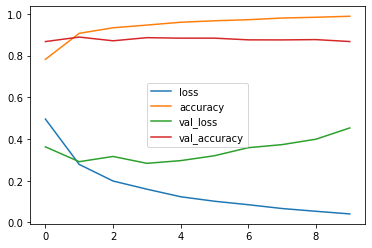

In [55]:
pd.DataFrame(history3.history).plot()

In [70]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model4.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics='accuracy')

history4 = model4.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512,
         validation_data = (x_val, y_val))

Epoch 1/10
30/30 [==============================] - 3s 53ms/step - loss: 0.5038 - accuracy: 0.7553 - val_loss: 0.3780 - val_accuracy: 0.8430
Epoch 2/10
30/30 [==============================] - 1s 33ms/step - loss: 0.2697 - accuracy: 0.9025 - val_loss: 0.2827 - val_accuracy: 0.8903
Epoch 3/10
30/30 [==============================] - 1s 30ms/step - loss: 0.1936 - accuracy: 0.9300 - val_loss: 0.2812 - val_accuracy: 0.8874
Epoch 4/10
30/30 [==============================] - 1s 31ms/step - loss: 0.1533 - accuracy: 0.9443 - val_loss: 0.2975 - val_accuracy: 0.8847
Epoch 5/10
30/30 [==============================] - 1s 37ms/step - loss: 0.1143 - accuracy: 0.9600 - val_loss: 0.3178 - val_accuracy: 0.8826
Epoch 6/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0912 - accuracy: 0.9705 - val_loss: 0.3722 - val_accuracy: 0.8766
Epoch 7/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0754 - accuracy: 0.9767 - val_loss: 0.3762 - val_accuracy: 0.8812
Epoch 8/10
30

<AxesSubplot:>

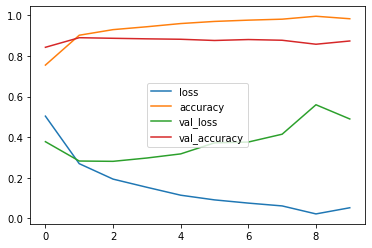

In [71]:
pd.DataFrame(history4.history).plot()

In [72]:
model4.evaluate(x_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.5393 - accuracy: 0.8612


[0.5393424034118652, 0.861240029335022]

In [73]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model5.compile(loss='MSE', optimizer=tf.keras.optimizers.RMSprop(), metrics='accuracy')

history5 = model5.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512,
         validation_data = (x_val, y_val))

Epoch 1/10
30/30 [==============================] - 3s 57ms/step - loss: 0.1654 - accuracy: 0.7813 - val_loss: 0.1225 - val_accuracy: 0.8444
Epoch 2/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0797 - accuracy: 0.9063 - val_loss: 0.0854 - val_accuracy: 0.8903
Epoch 3/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0568 - accuracy: 0.9329 - val_loss: 0.0818 - val_accuracy: 0.8897
Epoch 4/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0434 - accuracy: 0.9507 - val_loss: 0.1101 - val_accuracy: 0.8506
Epoch 5/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0354 - accuracy: 0.9584 - val_loss: 0.0847 - val_accuracy: 0.8867
Epoch 6/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0272 - accuracy: 0.9699 - val_loss: 0.0878 - val_accuracy: 0.8835
Epoch 7/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0219 - accuracy: 0.9753 - val_loss: 0.0994 - val_accuracy: 0.8716
Epoch 8/10
30

<AxesSubplot:>

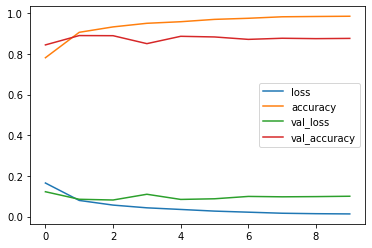

In [74]:
pd.DataFrame(history5.history).plot()

In [76]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model6.compile(loss='MSE', optimizer=tf.keras.optimizers.RMSprop(), metrics='accuracy')

history6 = model6.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512,
         validation_data = (x_val, y_val))

Epoch 1/10
30/30 [==============================] - 3s 48ms/step - loss: 0.1780 - accuracy: 0.7825 - val_loss: 0.1276 - val_accuracy: 0.8497
Epoch 2/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0923 - accuracy: 0.8985 - val_loss: 0.0932 - val_accuracy: 0.8856
Epoch 3/10
30/30 [==============================] - 1s 26ms/step - loss: 0.0652 - accuracy: 0.9267 - val_loss: 0.0860 - val_accuracy: 0.8875
Epoch 4/10
30/30 [==============================] - 1s 25ms/step - loss: 0.0483 - accuracy: 0.9476 - val_loss: 0.0909 - val_accuracy: 0.8759
Epoch 5/10
30/30 [==============================] - 1s 27ms/step - loss: 0.0394 - accuracy: 0.9557 - val_loss: 0.0847 - val_accuracy: 0.8829
Epoch 6/10
30/30 [==============================] - 1s 26ms/step - loss: 0.0302 - accuracy: 0.9691 - val_loss: 0.0862 - val_accuracy: 0.8857
Epoch 7/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0254 - accuracy: 0.9737 - val_loss: 0.0880 - val_accuracy: 0.8835
Epoch 8/10
30

In [77]:
model6.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.1047 - accuracy: 0.8649


[0.10470522195100784, 0.8648800253868103]

In [79]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model7.compile(loss='MSE', optimizer=tf.keras.optimizers.RMSprop(), metrics='accuracy')

history7 = model7.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512,
         validation_data = (x_val, y_val))

Epoch 1/10
30/30 [==============================] - 4s 72ms/step - loss: 0.1703 - accuracy: 0.7456 - val_loss: 0.0989 - val_accuracy: 0.8772
Epoch 2/10
30/30 [==============================] - 1s 44ms/step - loss: 0.0775 - accuracy: 0.9029 - val_loss: 0.0840 - val_accuracy: 0.8874
Epoch 3/10
30/30 [==============================] - 1s 44ms/step - loss: 0.0536 - accuracy: 0.9325 - val_loss: 0.1239 - val_accuracy: 0.8367
Epoch 4/10
30/30 [==============================] - 1s 43ms/step - loss: 0.0380 - accuracy: 0.9545 - val_loss: 0.0957 - val_accuracy: 0.8741
Epoch 5/10
30/30 [==============================] - 1s 43ms/step - loss: 0.0307 - accuracy: 0.9629 - val_loss: 0.0904 - val_accuracy: 0.8811
Epoch 6/10
30/30 [==============================] - 1s 47ms/step - loss: 0.0203 - accuracy: 0.9765 - val_loss: 0.0903 - val_accuracy: 0.8834
Epoch 7/10
30/30 [==============================] - 1s 45ms/step - loss: 0.0183 - accuracy: 0.9783 - val_loss: 0.0933 - val_accuracy: 0.8801
Epoch 8/10
30

In [80]:
model7.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.1089 - accuracy: 0.8661


[0.10893061757087708, 0.8661199808120728]

In [81]:
model8 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(10000,)),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model8.compile(loss='MSE', optimizer=tf.keras.optimizers.RMSprop(), metrics='accuracy')

history8 = model8.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512,
         validation_data = (x_val, y_val))

Epoch 1/10
30/30 [==============================] - 3s 69ms/step - loss: 0.1554 - accuracy: 0.7725 - val_loss: 0.0971 - val_accuracy: 0.8695
Epoch 2/10
30/30 [==============================] - 2s 54ms/step - loss: 0.0730 - accuracy: 0.9043 - val_loss: 0.0844 - val_accuracy: 0.8849
Epoch 3/10
30/30 [==============================] - 1s 46ms/step - loss: 0.0509 - accuracy: 0.9355 - val_loss: 0.0882 - val_accuracy: 0.8825
Epoch 4/10
30/30 [==============================] - 1s 45ms/step - loss: 0.0409 - accuracy: 0.9481 - val_loss: 0.1008 - val_accuracy: 0.8715
Epoch 5/10
30/30 [==============================] - 1s 48ms/step - loss: 0.0355 - accuracy: 0.9561 - val_loss: 0.1168 - val_accuracy: 0.8543
Epoch 6/10
30/30 [==============================] - 1s 44ms/step - loss: 0.0290 - accuracy: 0.9636 - val_loss: 0.1031 - val_accuracy: 0.8748
Epoch 7/10
30/30 [==============================] - 1s 46ms/step - loss: 0.0248 - accuracy: 0.9699 - val_loss: 0.1169 - val_accuracy: 0.8598
Epoch 8/10
30

In [82]:
model8.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.1249 - accuracy: 0.8571


[0.1249479427933693, 0.8571199774742126]

In [86]:
model9 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model9.compile(loss='MSE', optimizer=tf.keras.optimizers.RMSprop(), metrics='accuracy')

history9 = model9.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512,
         validation_data = (x_val, y_val))

Epoch 1/10
30/30 [==============================] - 4s 82ms/step - loss: 0.1679 - accuracy: 0.7507 - val_loss: 0.1246 - val_accuracy: 0.8230
Epoch 2/10
30/30 [==============================] - 2s 62ms/step - loss: 0.0753 - accuracy: 0.9009 - val_loss: 0.0833 - val_accuracy: 0.8855
Epoch 3/10
30/30 [==============================] - 2s 65ms/step - loss: 0.0520 - accuracy: 0.9319 - val_loss: 0.1397 - val_accuracy: 0.8158
Epoch 4/10
30/30 [==============================] - 2s 63ms/step - loss: 0.0366 - accuracy: 0.9533 - val_loss: 0.0905 - val_accuracy: 0.8766
Epoch 5/10
30/30 [==============================] - 2s 63ms/step - loss: 0.0222 - accuracy: 0.9731 - val_loss: 0.0884 - val_accuracy: 0.8849
Epoch 6/10
30/30 [==============================] - 2s 63ms/step - loss: 0.0111 - accuracy: 0.9870 - val_loss: 0.0966 - val_accuracy: 0.8758
Epoch 7/10
30/30 [==============================] - 2s 68ms/step - loss: 0.0038 - accuracy: 0.9962 - val_loss: 0.1048 - val_accuracy: 0.8724
Epoch 8/10
30

In [87]:
model9.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.1107 - accuracy: 0.8688


[0.11068309843540192, 0.8688399791717529]

In [88]:
model10 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model10.compile(loss='MSE', optimizer=tf.keras.optimizers.RMSprop(), metrics='accuracy')

history10 = model10.fit(partial_x_train, partial_y_train, epochs=5, batch_size=512,
         validation_data = (x_val, y_val))

Epoch 1/5
30/30 [==============================] - 2s 47ms/step - loss: 0.1732 - accuracy: 0.7378 - val_loss: 0.1030 - val_accuracy: 0.8663
Epoch 2/5
30/30 [==============================] - 1s 39ms/step - loss: 0.0776 - accuracy: 0.8999 - val_loss: 0.1546 - val_accuracy: 0.7863
Epoch 3/5
30/30 [==============================] - 1s 38ms/step - loss: 0.0492 - accuracy: 0.9367 - val_loss: 0.0831 - val_accuracy: 0.8866
Epoch 4/5
30/30 [==============================] - 1s 38ms/step - loss: 0.0352 - accuracy: 0.9561 - val_loss: 0.0855 - val_accuracy: 0.8864
Epoch 5/5
30/30 [==============================] - 1s 39ms/step - loss: 0.0234 - accuracy: 0.9713 - val_loss: 0.0924 - val_accuracy: 0.8820


In [89]:
model10.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.1000 - accuracy: 0.8711


[0.0999942272901535, 0.8711199760437012]

In [90]:
model11 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model11.compile(loss='MSE', optimizer=tf.keras.optimizers.Adam(), metrics='accuracy')

history11 = model11.fit(partial_x_train, partial_y_train, epochs=5, batch_size=512,
         validation_data = (x_val, y_val))

Epoch 1/5
30/30 [==============================] - 2s 47ms/step - loss: 0.1367 - accuracy: 0.8213 - val_loss: 0.0838 - val_accuracy: 0.8883
Epoch 2/5
30/30 [==============================] - 1s 36ms/step - loss: 0.0493 - accuracy: 0.9375 - val_loss: 0.0900 - val_accuracy: 0.8810
Epoch 3/5
30/30 [==============================] - 1s 37ms/step - loss: 0.0266 - accuracy: 0.9709 - val_loss: 0.0992 - val_accuracy: 0.8762
Epoch 4/5
30/30 [==============================] - 1s 36ms/step - loss: 0.0160 - accuracy: 0.9842 - val_loss: 0.1059 - val_accuracy: 0.8702
Epoch 5/5
30/30 [==============================] - 1s 35ms/step - loss: 0.0107 - accuracy: 0.9896 - val_loss: 0.1091 - val_accuracy: 0.8676


In [91]:
model11.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.1189 - accuracy: 0.8575


[0.11890143901109695, 0.8575199842453003]

In [98]:
model12 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model12.compile(loss='MSE', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics='accuracy')

history12 = model12.fit(partial_x_train, partial_y_train, epochs=5, batch_size=512,
         validation_data = (x_val, y_val))

Epoch 1/5
30/30 [==============================] - 2s 42ms/step - loss: 0.2447 - accuracy: 0.6113 - val_loss: 0.2323 - val_accuracy: 0.7373
Epoch 2/5
30/30 [==============================] - 1s 31ms/step - loss: 0.1959 - accuracy: 0.8203 - val_loss: 0.1550 - val_accuracy: 0.8357
Epoch 3/5
30/30 [==============================] - 1s 32ms/step - loss: 0.1121 - accuracy: 0.8819 - val_loss: 0.1005 - val_accuracy: 0.8712
Epoch 4/5
30/30 [==============================] - 1s 32ms/step - loss: 0.0698 - accuracy: 0.9188 - val_loss: 0.0867 - val_accuracy: 0.8857
Epoch 5/5
30/30 [==============================] - 1s 31ms/step - loss: 0.0496 - accuracy: 0.9453 - val_loss: 0.0834 - val_accuracy: 0.8884


In [99]:
model12.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.0887 - accuracy: 0.8806


[0.08871732652187347, 0.8805599808692932]

In [113]:
model13 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model13.compile(loss='MSE', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics='accuracy')

history13 = model13.fit(partial_x_train, partial_y_train, epochs=7, batch_size=512,
         validation_data = (x_val, y_val))

Epoch 1/7
30/30 [==============================] - 2s 48ms/step - loss: 0.2456 - accuracy: 0.6319 - val_loss: 0.2355 - val_accuracy: 0.7567
Epoch 2/7
30/30 [==============================] - 1s 34ms/step - loss: 0.2033 - accuracy: 0.8231 - val_loss: 0.1636 - val_accuracy: 0.8412
Epoch 3/7
30/30 [==============================] - 1s 34ms/step - loss: 0.1187 - accuracy: 0.8831 - val_loss: 0.1039 - val_accuracy: 0.8702
Epoch 4/7
30/30 [==============================] - 1s 33ms/step - loss: 0.0716 - accuracy: 0.9197 - val_loss: 0.0893 - val_accuracy: 0.8829
Epoch 5/7
30/30 [==============================] - 1s 33ms/step - loss: 0.0503 - accuracy: 0.9467 - val_loss: 0.0836 - val_accuracy: 0.8885
Epoch 6/7
30/30 [==============================] - 1s 35ms/step - loss: 0.0371 - accuracy: 0.9607 - val_loss: 0.0852 - val_accuracy: 0.8847
Epoch 7/7
30/30 [==============================] - 1s 33ms/step - loss: 0.0277 - accuracy: 0.9744 - val_loss: 0.0852 - val_accuracy: 0.8855


In [114]:
model13.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.0912 - accuracy: 0.8776


[0.09117777645587921, 0.877560019493103]

In [116]:
model14 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model14.compile(loss='MAE', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics='accuracy')

history14 = model14.fit(partial_x_train, partial_y_train, epochs=15, batch_size=512,
         validation_data = (x_val, y_val))

Epoch 1/15
30/30 [==============================] - 2s 44ms/step - loss: 0.4934 - accuracy: 0.5136 - val_loss: 0.4783 - val_accuracy: 0.5526
Epoch 2/15
30/30 [==============================] - 1s 33ms/step - loss: 0.4261 - accuracy: 0.7214 - val_loss: 0.3540 - val_accuracy: 0.8114
Epoch 3/15
30/30 [==============================] - 1s 32ms/step - loss: 0.2548 - accuracy: 0.8609 - val_loss: 0.2028 - val_accuracy: 0.8614
Epoch 4/15
30/30 [==============================] - 1s 33ms/step - loss: 0.1419 - accuracy: 0.9037 - val_loss: 0.1513 - val_accuracy: 0.8788
Epoch 5/15
30/30 [==============================] - 1s 32ms/step - loss: 0.0980 - accuracy: 0.9281 - val_loss: 0.1346 - val_accuracy: 0.8852
Epoch 6/15
30/30 [==============================] - 1s 32ms/step - loss: 0.0741 - accuracy: 0.9448 - val_loss: 0.1282 - val_accuracy: 0.8863
Epoch 7/15
30/30 [==============================] - 1s 32ms/step - loss: 0.0584 - accuracy: 0.9546 - val_loss: 0.1244 - val_accuracy: 0.8858
Epoch 8/15
30

In [117]:
model14.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.1301 - accuracy: 0.8744


[0.13008251786231995, 0.8743600249290466]

In [120]:
model15 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model15.compile(loss='MAE', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005), metrics='accuracy')

history15 = model15.fit(partial_x_train, partial_y_train, epochs=15, batch_size=512,
         validation_data = (x_val, y_val))

Epoch 1/15
30/30 [==============================] - 2s 43ms/step - loss: 0.3513 - accuracy: 0.7389 - val_loss: 0.1528 - val_accuracy: 0.8683
Epoch 2/15
30/30 [==============================] - 3s 104ms/step - loss: 0.0996 - accuracy: 0.9081 - val_loss: 0.1203 - val_accuracy: 0.8859
Epoch 3/15
30/30 [==============================] - 1s 33ms/step - loss: 0.0626 - accuracy: 0.9421 - val_loss: 0.1219 - val_accuracy: 0.8804
Epoch 4/15
30/30 [==============================] - 1s 33ms/step - loss: 0.0481 - accuracy: 0.9549 - val_loss: 0.1228 - val_accuracy: 0.8786
Epoch 5/15
30/30 [==============================] - 1s 32ms/step - loss: 0.0404 - accuracy: 0.9615 - val_loss: 0.1241 - val_accuracy: 0.8784
Epoch 6/15
30/30 [==============================] - 1s 33ms/step - loss: 0.0350 - accuracy: 0.9665 - val_loss: 0.1234 - val_accuracy: 0.8774
Epoch 7/15
30/30 [==============================] - 1s 35ms/step - loss: 0.0324 - accuracy: 0.9683 - val_loss: 0.1247 - val_accuracy: 0.8780
Epoch 8/15
3

In [ ]:
#model12 = tf.keras.Sequential([
#    tf.keras.layers.Dense(128, activation='relu', input_shape=(10000,)),
#    tf.keras.layers.Dense(128, activation='relu'),
#    tf.keras.layers.Dense(128, activation='relu'),
#    tf.keras.layers.Dense(128, activation='relu'),
#    tf.keras.layers.Dense(1, activation='sigmoid')
#])
#
#model12.compile(loss='MSE', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics='accuracy')
#
#history12 = model12.fit(partial_x_train, partial_y_train, epochs=5, batch_size=512,
#        validation_data = (x_val, y_val))

In [ ]:
#regularyzacja - porownanie 

In [22]:
model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.001) ,input_shape=(10000,)),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_reg.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics='accuracy')

history_reg = model_reg.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
         validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5661 - accuracy: 0.7939 - val_loss: 0.4442 - val_accuracy: 0.8661
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3679 - accuracy: 0.8965 - val_loss: 0.3596 - val_accuracy: 0.8842
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2933 - accuracy: 0.9191 - val_loss: 0.3357 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2573 - accuracy: 0.9316 - val_loss: 0.3280 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2338 - accuracy: 0.9394 - val_loss: 0.3315 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2192 - accuracy: 0.9457 - val_loss: 0.3411 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2087 - accuracy: 0.9503 - val_loss: 0.3445 - val_accuracy: 0.8842
Epoch 8/20
30

<AxesSubplot:>

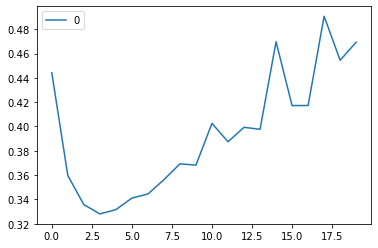

In [23]:
pd.DataFrame(history_reg.history['val_loss']).plot()

In [21]:
model_wreg = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_wreg.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics='accuracy')

history_wreg = model_wreg.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
         validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 47ms/step - loss: 0.4956 - accuracy: 0.7958 - val_loss: 0.3634 - val_accuracy: 0.8764
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2895 - accuracy: 0.9061 - val_loss: 0.3097 - val_accuracy: 0.8783
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2183 - accuracy: 0.9275 - val_loss: 0.2847 - val_accuracy: 0.8859
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1725 - accuracy: 0.9439 - val_loss: 0.2788 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1423 - accuracy: 0.9531 - val_loss: 0.2889 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1149 - accuracy: 0.9652 - val_loss: 0.2936 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0934 - accuracy: 0.9720 - val_loss: 0.3120 - val_accuracy: 0.8825
Epoch 8/20
30

<AxesSubplot:>

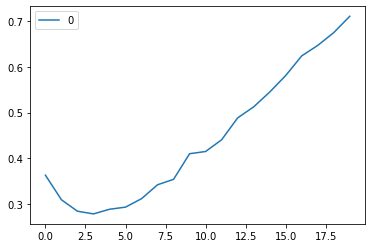

In [24]:
pd.DataFrame(history_wreg.history['val_loss']).plot()

In [25]:
#dropout

In [26]:
model_dropout = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_dropout.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics='accuracy')

history_dropout = model_dropout.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
         validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.6365 - accuracy: 0.6179 - val_loss: 0.5492 - val_accuracy: 0.8456
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5354 - accuracy: 0.7493 - val_loss: 0.4754 - val_accuracy: 0.8708
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4747 - accuracy: 0.8151 - val_loss: 0.4127 - val_accuracy: 0.8813
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.4173 - accuracy: 0.8553 - val_loss: 0.3676 - val_accuracy: 0.8876
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3767 - accuracy: 0.8735 - val_loss: 0.3468 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3366 - accuracy: 0.8933 - val_loss: 0.3216 - val_accuracy: 0.8772
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3040 - accuracy: 0.9044 - val_loss: 0.3069 - val_accuracy: 0.8900
Epoch 8/20
30

<AxesSubplot:>

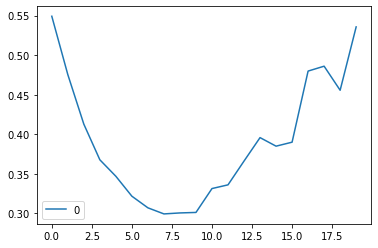

In [27]:
pd.DataFrame(history_dropout.history['val_loss']).plot()